Para esta sesión utilizaremos como base de datos una encuesta realizada a estudiantes universitarios sobre el desempeño de varios profesores. Puedes ver la descripción [aquí](http://archive.ics.uci.edu/ml/datasets/turkiye+student+evaluation). 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
eval_df=pd.read_csv("turkiye-student-evaluation_generic.csv")
eval_df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
eval_df.shape

(5820, 33)

In [9]:
questions_df = eval_df.iloc[:,5:33]
questions_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
question_means = questions_df.mean(axis = 0)
question_means

Q1     2.929897
Q2     3.073883
Q3     3.178694
Q4     3.082474
Q5     3.105842
Q6     3.107388
Q7     3.066323
Q8     3.041924
Q9     3.165979
Q10    3.090722
Q11    3.183849
Q12    3.035567
Q13    3.242784
Q14    3.290893
Q15    3.287285
Q16    3.169588
Q17    3.398454
Q18    3.222509
Q19    3.261684
Q20    3.285395
Q21    3.307388
Q22    3.317526
Q23    3.201890
Q24    3.166838
Q25    3.312543
Q26    3.222165
Q27    3.154811
Q28    3.308076
dtype: float64

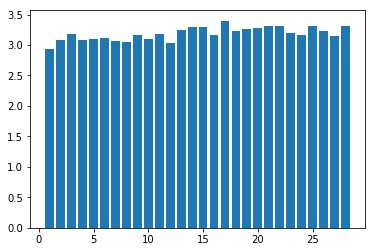

In [11]:
plt.bar(np.arange(1,29,1), question_means, width=0.8, bottom=None)
plt.show()

Comenzaremos por aprender 3 algoritmos distintos de clusterización muy comúnmente utilizados en ciencia de datos. Para esto utilizaremos la librería `sklearn` donde estos algoritmos ya vienen programados. Puedes ver más información acerca de los algoritmos de clusterización de la librería [aquí](https://scikit-learn.org/stable/modules/clustering.html).

## K-Means

Ya lo introdujumos la clase pasada. Consiste en los siguientes pasos:

1. Seleccionar de manera aleatoria $k$ puntos $\mathbf{x_1},...,\mathbf{x_k}$, los cuales se convertirán en los "centroides" de cada cluster.
2. Asignar a cada punto en los datos el centroide más cercano según la métrica de distancia especificada.
3. Recalcular el centroide de cada cluster como el promedio de los demás puntos asignados a ese cluster.
4. Repetir 2 y 3 hasta que se cumpla una condición. Puede ser:
    * No haber cambios en la asignación de puntos a los clusters
    * Terminar un número máximo de operaciones
    * Los centroides se mueven distancias menores a un número fijo

<img src="https://cdn-images-1.medium.com/max/800/1*KrcZK0xYgTa4qFrVr0fO2w.gif">

**Obs:**

1. Para obtener la clusterización basta introducir los datos $X$ sin las etiquetas $Y$ (No-supervisado)
2. La elección de $k$ para el número de clusters dará diferentes resultados de clasificación.
3. La elección de los centroides para inicializar el algoritmo es aleatoria, por lo que cada corrida dará resultados distintos. (También pueden fijarse los puntos con los que se inician los centroides).
4. La elección de métrica de distancia (pares de puntos) también determina el resultado.
5. Debido a que se asignan puntos al centroide más cercano, los clusters siempre serán convexos según la métrica. (Tendrán forma esferoidal en el caso de la distancia Euclidiana). Esto significa que no necesariamente será bueno utilizar K-Means en todos los casos.


<img src="https://cdn-images-1.medium.com/max/800/1*Xvl-pXxsLAZ7gbTUuvgMtA.png">

In [12]:
from sklearn.cluster import KMeans
kmeanModel=KMeans(n_clusters=8, init="random", n_init=10, max_iter=300, tol=0.0001,
       precompute_distances="auto", verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm="auto")
kmeanModel.fit(questions_df)
kmeanModel.predict(questions_df)

array([2, 2, 5, ..., 5, 3, 3], dtype=int32)

## DBSCAN 

El acrónimo significa: Density-Based Spatial Clustering of Applications with Noise. Consiste en:

1. Se inicia por seleccionar un punto aleatorio (no visitado) de la base de datos $\mathbf{x_0}$.
2. Se construye la vecindad del punto seleccionado: todos los puntos que se encuentren a una distancia menor a $\epsilon$ de $\mathbf{x_0}$.
3. Si hay al menos $n_{min}$ puntos en la vecindad, entonces $\mathbf{x_0}$ se añade al cluster actual, si no se clasifica como ruido (usualmente etiquetado con -1). Se marca $\mathbf{x_0}$ como "visitado".
4. Se elije un punto no visitado en la vecindad.
5. Se repiten los pasos 2,3 y 4 hasta que todos los puntos en la vecindad de algún punto sean puntos "visitados", con lo que se termina la construcción del cluster.
6. Se repiten los pasos 2 a 5 para nuevos clusters hasta haber marcado todos los puntos en la base como "visitados".

<img src="https://cdn-images-1.medium.com/max/800/1*tc8UF-h0nQqUfLC8-0uInQ.gif">

**Obs:**

1. Necesita 2 parámetros: $\epsilon$ y $n_{min}$.
2. La elección de métrica también puede afectar los resultados de la clusterización.
3. Dado que las nuevas vecindades se van añadiendo al cluster, forman clusters conexos (nunca tendran grandes separaciones). La forma y tamaños de estos pueden ser muy variados a diferencia de los que se obtienen con K-Means.   
4. Debido a que $\epsilon$ y $n_{min}$ son fijos, el algoritmo no es capaz de adaptarse a clusters de distinta densidad.

In [13]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=50, min_samples=2, metric="euclidean", metric_params=None, 
       algorithm="auto", leaf_size=30, p=None, n_jobs=None)
dbscan.fit_predict(questions_df) #ojo, no tiene el método predict: dbscan.predict(cancer_df) regresa un error

array([0, 0, 0, ..., 0, 0, 0])

## Agglomerative Hierarchical Clustering

La idea general de este algoritmo es agrupar progresivamente los clusters de la base de datos en clusters según su cercanía (linkage o enlace). Consiste en:

1. Cada punto en la base de datos se trata como un cluster independiente.
2. Se elijen los 2 clusters con la mayor cercanía (e.g. menor average linkage) y se combinan en uno solo.
3. Se repite el paso 2 hasta que se cumpla una condición. Puede ser:
    * Se llege a un número mínimo de clusters.
    * La separación mínima (enlace) entre clusters sea mayor a un número fijo.

<img src=https://cdn-images-1.medium.com/max/800/1*ET8kCcPpr893vNZFs8j4xg.gif>

**Obs:**

1. Requiere un parámetro: el número mínimo de clusters, o el valor máximo del enlace a considerar.
2. La elección del enlace modificará el resultado del algoritmo, aunque los resultados tienden a no varíar tanto con esta elección a diferencia de en otros algoritmos.
3. La aglomeración progresiva de clusters forma un dendrograma en donde los la parte inferior (sin agrupar) se denominan hojas y la superior (un sólo cluster) se denomina raíz. 

In [14]:
from sklearn.cluster import AgglomerativeClustering
aggclus=AgglomerativeClustering(n_clusters=2, affinity="euclidean", memory=None, connectivity=None, 
                        compute_full_tree="auto", linkage="ward", pooling_func="deprecated")
aggclus.fit_predict(questions_df) #tampoco tiene el método predict

array([0, 0, 1, ..., 1, 0, 0])

# Evaluación de Clusters

Una vez que tenemos el resultado de una clusterización, ¿cómo evaluamos si los resultados de esta son buenos?. Dado que estos son métodos no supervisados no tenemos un vector de etiquetas $Y$ que nos permita calcular el desempeño del algoritmo en esta tarea de este modo. Sin embargo, existen disntintos métodos para la evaluación de la clusterización según el algoritmo que se utilice.

### Método de Distorción: Encontrar el Codo en la Curva

Este método se utiliza para evaluar el rendimiento del algoritmo K-Means clustering en función del valor de $k$. Consiste en:

Enternar el algoritmo hasta la convergencia para distintos valores de $k$. En cada iteración se calcula la suma de errores cuadráticos (SSE) también llamada distorción. En este caso, la suma de errores cuadráticos se calcula como el cuadrado de las distancias de los puntos de cada cluster a su respectivo centroide. Si los puntos son más cercanos al centroide podremos tener un mejor resultado en la clusterización, pero para no sobreajuster el modelo utilizaremos el valor de $k$ que tiene la mayor diferencia en el erro cuadrático medio.

**Obs.** Podemos utilizar otras funciones para calcular el error: el promedio de los errores cuadrádicos, la suma de los errores (distancias), etc.

calculando  1  clusters
calculando  2  clusters
calculando  3  clusters
calculando  4  clusters
calculando  5  clusters
calculando  6  clusters
calculando  7  clusters
calculando  8  clusters
calculando  9  clusters
calculando  10  clusters
calculando  11  clusters
calculando  12  clusters
calculando  13  clusters
calculando  14  clusters
calculando  15  clusters
calculando  16  clusters
calculando  17  clusters
calculando  18  clusters
calculando  19  clusters


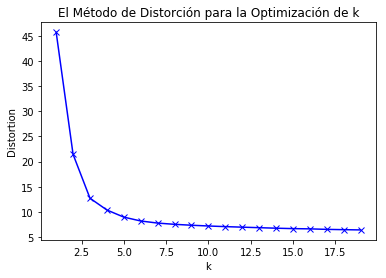

In [15]:
import scipy.spatial.distance as ssd

distortions = []
K = range(1,20)
for k in K:
    print ('calculando ',k,' clusters')
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(questions_df)
    distortions.append(sum(np.min(ssd.cdist(questions_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / questions_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('El Método de Distorción para la Optimización de k')
plt.show()

En este caso, $k=3$ parece ser el valor de $k$ indicado según el método. Visualicemos el resultado:

In [16]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(questions_df)
model_labels=kmeanModel.labels_ #esto es equivalente a kmeanModel.predict(questions_df)
model_labels

array([1, 1, 0, ..., 0, 2, 2], dtype=int32)

In [17]:
questions_df['labels']=model_labels
questions_df

/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
5,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
6,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
8,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
9,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0


In [18]:
centroids=kmeanModel.cluster_centers_
centroids

array([[4.10071942, 4.26169065, 4.29451439, 4.24730216, 4.31339928,
        4.2756295 , 4.26393885, 4.23875899, 4.30350719, 4.32014388,
        4.33453237, 4.22257194, 4.39298561, 4.41366906, 4.40647482,
        4.3772482 , 4.41681655, 4.38893885, 4.40917266, 4.41861511,
        4.42401079, 4.43615108, 4.39028777, 4.35791367, 4.41906475,
        4.37679856, 4.31160072, 4.4096223 ],
       [2.63061917, 2.8307888 , 3.00296862, 2.84860051, 2.86768448,
        2.89821883, 2.81382528, 2.78625954, 2.96649703, 2.83545377,
        3.        , 2.78498728, 3.11535199, 3.19974555, 3.18744699,
        2.98261238, 3.3706531 , 3.07972858, 3.14079729, 3.19380831,
        3.22264631, 3.2264631 , 3.03095844, 2.97879559, 3.2230704 ,
        3.07379135, 2.98134012, 3.2230704 ],
       [1.39660743, 1.40306947, 1.5088853 , 1.43537964, 1.3901454 ,
        1.40710824, 1.39579968, 1.37883683, 1.50242326, 1.36833603,
        1.46688207, 1.38045234, 1.41922456, 1.44749596, 1.46688207,
        1.35621971, 1.6219

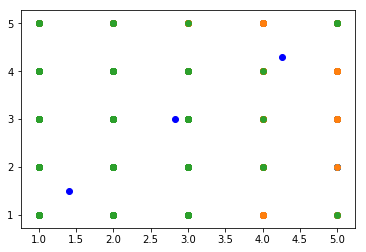

In [19]:
df=questions_df

for i,lab in enumerate(set(model_labels)):
    #data
    df=questions_df[questions_df['labels']==lab].iloc[:,[1,2]]
    
    x=df.iloc[:,0]
    y=df.iloc[:,1]
    plt.scatter(x,y,cmap=plt.get_cmap('jet'))
       
    #centroid
    x=centroids[i,1]
    y=centroids[i,2]
    plt.scatter(x,y,color='blue')
        
plt.show()
        

¿Como podemos graficar todas las combinaciones de variables?

In [20]:
import itertools
list(itertools.combinations(range(1,10), 2))

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

### Ejercicio

In [21]:
#Utiliza la función anterior para graficar las clusterizaciones con todas las posibles combinaciones de variables

### Análisis de Silueta

Incluso si no tenemos las etiquetas para hacer un análisis supervisado, hay varias formas de medir la "calidad" de la clusterización. Estos son medidas o índicadores que utilizan, a grandes rasgos, 2 cantidades:

- Qué tan "concentrados" o "compactos" son los clusters (a)
- Cuál es la "distancia" entre estos (b)

El artículo de [Arbelaitz et al](https://www.sciencedirect.com/science/article/abs/pii/S003132031200338X) hace un análisis comparativo de estas medidas.

Una medida prominente es la Siluieta. Es una función que se define como:

$$s(i) = \frac{b(i) - a(i)}{\max\{a(i),b(i)\}},$$

la cual toma valores entre -1 y 1. Si $a(i)<<b(i)$, entonces $s(i)\approx 1$, lo cual indica que los clusters están más separados entre sí, i.e. hay una mejor clusterización.

Por lo tanto, la idea con esta medida y las otras introducidas en el artículo es encontrar una combinación de parámetros que la maximice (o minimice, según sea el caso).

Para este método utilizaremos el algoritmo DBSCAN, variando los parámetros $\epsilon$ y $n_{min}$ y trateremos de obtener un valor óptimo de la Silueta.

In [22]:
np.logspace(-2,1.1,10)

array([1.00000000e-02, 2.21026550e-02, 4.88527357e-02, 1.07977516e-01,
       2.38658979e-01, 5.27499706e-01, 1.16591440e+00, 2.57698037e+00,
       5.69581081e+00, 1.25892541e+01])

In [23]:
np.arange(2,10,1)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
questions_df.shape

(5820, 29)

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

df=questions_df.iloc[:1000,:]

grid_dbs={'eps':np.logspace(-2,1.1,10),'min_samples':np.arange(2,10,1)}

resultados=[]

for e in grid_dbs['eps']:
    for s in grid_dbs['min_samples']:
        
        #try:
        
        DBS=DBSCAN(eps=e,min_samples=s)
        predicted_dbs = DBS.fit_predict(df)
        sil=silhouette_score(df,predicted_dbs)
        resultados.append([sil,e,s,predicted_dbs])
            
        print(sil,e,s)
            
        #except:
            #pass
        
res_dbs_df=pd.DataFrame(resultados)
res_dbs_df.columns=['sil','eps','min samples','Predictions']
res_dbs_df=res_dbs_df.sort_values(by=['sil'],ascending=False)
res_dbs_df

0.39642494017524255 0.01 2
0.3731681395504488 0.01 3
0.3683728861751856 0.01 4
0.35369569605119744 0.01 5
0.35369569605119744 0.01 6
0.35369569605119744 0.01 7
0.34153073299304015 0.01 8
0.34153073299304015 0.01 9
0.39642494017524255 0.022102654979706378 2
0.3731681395504488 0.022102654979706378 3
0.3683728861751856 0.022102654979706378 4
0.35369569605119744 0.022102654979706378 5
0.35369569605119744 0.022102654979706378 6
0.35369569605119744 0.022102654979706378 7
0.34153073299304015 0.022102654979706378 8
0.34153073299304015 0.022102654979706378 9
0.39642494017524255 0.04885273571519389 2
0.3731681395504488 0.04885273571519389 3
0.3683728861751856 0.04885273571519389 4
0.35369569605119744 0.04885273571519389 5
0.35369569605119744 0.04885273571519389 6
0.35369569605119744 0.04885273571519389 7
0.34153073299304015 0.04885273571519389 8
0.34153073299304015 0.04885273571519389 9
0.39642494017524255 0.10797751623277094 2
0.3731681395504488 0.10797751623277094 3
0.3683728861751856 0.107977

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### Dendrograma: Método de Visualización

In [25]:
from sklearn.cluster import AgglomerativeClustering
aggclus=AgglomerativeClustering(n_clusters=2, affinity="euclidean", memory=None, connectivity=None, 
                        compute_full_tree="auto", linkage="ward", pooling_func="deprecated")
aggclus.fit_predict(questions_df)

array([0, 0, 1, ..., 1, 0, 0])

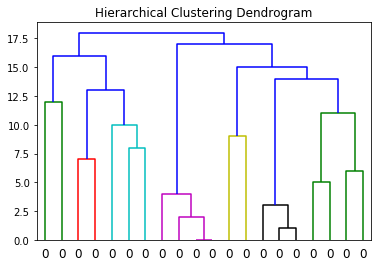

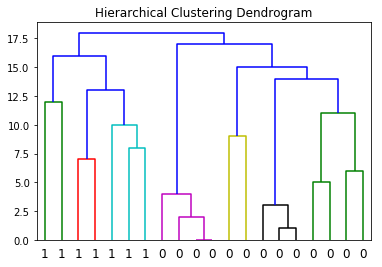

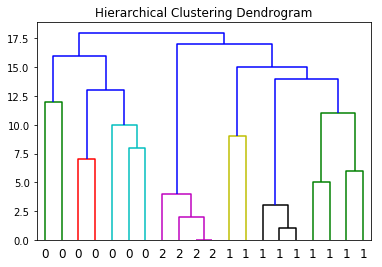

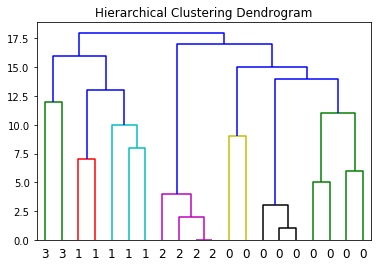

In [26]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
iris = load_iris()
x = iris.data[:20]

for n in [1,2,3,4]:

    model = AgglomerativeClustering(n_clusters=n)
    
    model = model.fit(x)
    plt.title('Hierarchical Clustering Dendrogram')
    plot_dendrogram(model, labels=model.labels_)
    plt.show()

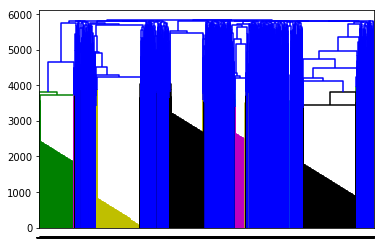

In [27]:
plot_dendrogram(aggclus, labels=aggclus.labels_)

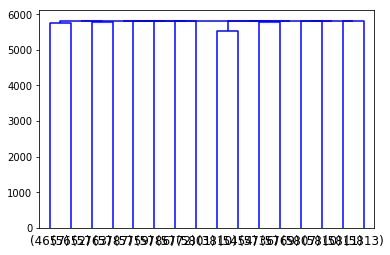

In [29]:
plot_dendrogram(aggclus, labels=aggclus.labels_,p=3,truncate_mode='level')

In [36]:
X=np.random.random((5,4))

In [40]:
from scipy.spatial.distance import pdist

ytdist=pdist(X, metric='euclidean')
ytdist

array([0.71386982, 0.98750577, 1.07376077, 0.686587  , 0.92134086,
       0.80003195, 0.73542285, 0.7838525 , 0.69346273, 0.82557803])

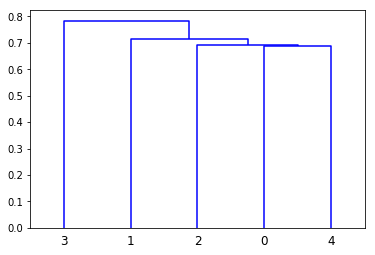

In [41]:
Z = linkage(ytdist, 'single')
plt.figure()
dn=dendrogram(Z)

# Fuentes: 

* [George Seif. Towards Data Science: The 5 Clustering Algorithms Data Scientists Need to Know](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)
* [Tama Handika. Practicing Clustering Techniques on Survey Dataset](https://medium.com/@blazetamareborn/practicing-clustering-techniques-on-survey-dataset-f7d7a322e6ff)
* [Arbelaitz et al. An extensive comparative study of cluster validity indices](https://www.sciencedirect.com/science/article/abs/pii/S003132031200338X)